In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

# 데이터 전처리

In [2]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [3]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [4]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [5]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [6]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [7]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 모델 생성 및 예측(과제부분)

In [8]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [9]:
from xgboost import XGBRFRegressor as xg
from bayes_opt import BayesianOptimization as bo

def xgb(max_depth, gamma, min_child_weight):
    sample_model = xg(max_depth = int(max_depth),
                      gamma = gamma,
                      min_child_weight = min_child_weight)
    sample_model.fit(train_x, train_y)
    
    return sample_model.score(train_x, train_y)



epsilon = 0.1 ** 10
float_range = (epsilon, 1 - epsilon)
int_range = (1, 20000)

pbounds = {'max_depth': int_range,
           'gamma': float_range,
           'min_child_weight': int_range
          }

optimizer = bo(f=xgb, pbounds=pbounds)
optimizer.maximize(n_iter=100)

|   iter    |  target   |   gamma   | max_depth | min_ch... |
-------------------------------------------------------------
|  1        | -1.17e-05 |  0.6101   |  2.133e+0 |  283.4    |
|  2        | -0.1503   |  0.6103   |  1.384e+0 |  1.427e+0 |
|  3        | -0.1503   |  0.9467   |  1.384e+0 |  1.275e+0 |
|  4        | -0.1503   |  0.6293   |  6.064e+0 |  1.536e+0 |
|  5        | -0.1503   |  0.8619   |  6.131e+0 |  1.918e+0 |
|  6        | -0.1503   |  0.9471   |  1.208e+0 |  3.64e+03 |
|  7        |  0.1823   |  0.7147   |  2.038e+0 |  201.7    |
|  8        | -0.1503   |  0.3077   |  1.006e+0 |  1.055e+0 |
|  9        |  0.2031   |  0.9003   |  1.977e+0 |  182.0    |
|  10       |  0.3839   |  0.3945   |  2.114e+0 |  47.01    |
|  11       |  0.5192   |  0.8342   |  1.676e+0 |  11.62    |
|  12       |  0.4076   |  0.5853   |  2.119e+0 |  34.81    |
|  13       |  0.2315   |  0.8189   |  1.398e+0 |  159.2    |
|  14       | -0.1503   |  0.4694   |  1.028e+0 |  1.102e+0 |
|  15   

|  80       |  0.1462   |  0.3147   |  28.69    |  230.7    |
|  81       |  0.2954   |  0.3521   |  2.193e+0 |  101.5    |
|  82       |  0.2492   |  0.2847   |  1.119e+0 |  144.1    |
|  83       |  0.2512   |  0.2411   |  2.881e+0 |  142.2    |
|  84       |  0.6183   |  0.1145   |  1.155e+0 |  6.951    |
|  85       |  0.2322   |  0.158    |  287.7    |  158.6    |
|  86       |  0.5912   |  0.2413   |  1.442e+0 |  7.73     |
|  87       |  0.3127   |  0.5894   |  1.402e+0 |  75.32    |
|  88       |  0.3989   |  0.3595   |  1.478e+0 |  40.91    |
|  89       |  0.3079   |  0.5274   |  1.206e+0 |  83.35    |
|  90       |  0.3007   |  0.1009   |  4.371e+0 |  96.13    |
|  91       |  0.2582   |  0.2355   |  2.729e+0 |  132.2    |
|  92       |  0.5061   |  0.7467   |  2.192e+0 |  13.15    |
|  93       |  0.1902   |  0.6992   |  4.287e+0 |  195.4    |
|  94       |  0.6183   |  0.008076 |  1.742e+0 |  6.299    |
|  95       |  0.8859   |  0.1017   |  2.941e+0 |  1.123    |
|  96   

In [10]:
from xgboost import XGBRFRegressor as xg

model=xg(gamma=0.8183,  max_depth=20, min_child_weight=1.7)
model.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0.8183, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=20, max_leaves=0,
               min_child_weight=1.7, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [11]:
pred = model.predict(test)

# 제출

In [12]:
submission = pd.read_csv('submission.csv')
submission

,title,box_off_num
0,용서는 없다,2.093115e+06
1,아빠가 여자를 좋아해,1.300433e+06
2,하모니,1.144886e+06
3,의형제,1.967740e+06
4,평행 이론,1.057309e+06
...,...,...
238,해에게서 소년에게,2.512371e+04
239,울보 권투부,5.556886e+03
240,어떤살인,2.737843e+05
241,말하지 못한 비밀,9.288580e+03


In [13]:
submission['box_off_num'] = pred

In [14]:
submission

,title,box_off_num
0,용서는 없다,2.093115e+06
1,아빠가 여자를 좋아해,1.300433e+06
2,하모니,1.144886e+06
3,의형제,1.967740e+06
4,평행 이론,1.057309e+06
...,...,...
238,해에게서 소년에게,2.512371e+04
239,울보 권투부,5.556886e+03
240,어떤살인,2.737843e+05
241,말하지 못한 비밀,9.288580e+03


In [15]:
submission.to_csv('submission.csv',index = False)

# 제출 점수(과제부분)

https://dacon.io/competitions/open/235536/overview/description

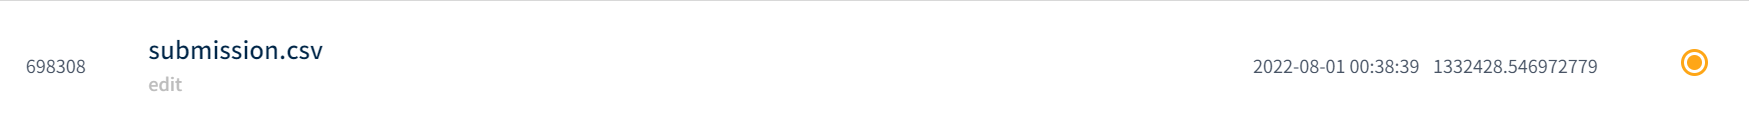